In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model_path = "/Volumes/무제/coding/AI/custom_cnn/val 77.2.h5/"

In [3]:
model = load_model(model_path)

In [4]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_20 (Sequential)  (None, 90, 90, 3)         0         
                                                                 
 sequential_21 (Sequential)  (None, 90, 90, 3)         0         
                                                                 
 conv2d_29 (Conv2D)          (None, 88, 88, 32)        896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 44, 44, 32)       0         
 g2D)                                                            
                                                                 
 depthwise_conv2d_8 (Depthwi  (None, 44, 44, 32)       320       
 seConv2D)                                                       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 22, 22, 32)     

In [5]:
classes = ['broken', 'discolored', 'pure', 'silkcut']

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(150, 150))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_processed)

    indexk = np.argsort(prediction[0,:])[::-1]

    for i in range(4):
        print("{}. {} ({:.3})".format(i+1, classes[indexk[i]], prediction[0, indexk[i]]))

    index = np.argmax(prediction)
    print()
    print(classes[index])
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array.astype(np.uint8))

2023-10-26 14:07:01.029692: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 1s/step
1. pure (0.887)
2. broken (0.103)
3. discolored (0.00856)
4. silkcut (0.000729)

pure


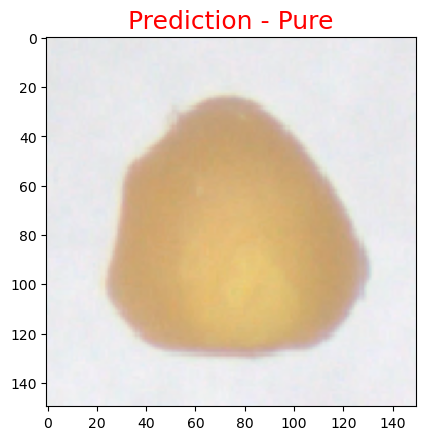

In [8]:
predict_image("/Volumes/무제/coding/AI/custom_cnn/dataset/test/pure/pure_32.png", model)